# examine pha2 files

In [1]:
#source /export/ciao/bin/ciao.bash -o
PFILES="./param;$ASCDS_INSTALL/param:$ASCDS_INSTALL/contrib/param"
mkdir -p ./param
ASCDS_WORK_PATH=./


## download

In [2]:
download_chandra_obsid 459,460,1198,1800 evt2,pha2


  Type     Format      Size  0........H.........1  Download Time Average Rate
  ---------------------------------------------------------------------------
  evt2     fits       22 Mb  ####################          < 1 s  38128.8 kb/s
  pha2     fits        1 Mb  ####################          < 1 s  33131.7 kb/s

      Total download size for ObsId 459 = 23 Mb
      Total download time for ObsId 459 = < 1 s


  Type     Format      Size  0........H.........1  Download Time Average Rate
  ---------------------------------------------------------------------------
  evt2     fits       91 Mb  ####################            2 s  44761.1 kb/s
  pha2     fits      432 Kb  ####################          < 1 s  16804.0 kb/s

      Total download size for ObsId 460 = 92 Mb
      Total download time for ObsId 460 = 2 s


  Type     Format      Size  0........H.........1  Download Time Average Rate
  ---------------------------------------------------------------------------
  evt2     fits    

In [3]:
mv -fv */primary/*fits.gz .
gunzip -f *fits.gz 

'1198/primary/acisf01198N004_evt2.fits.gz' -> './acisf01198N004_evt2.fits.gz'
'1198/primary/acisf01198N004_pha2.fits.gz' -> './acisf01198N004_pha2.fits.gz'
'1800/primary/hrcf01800N008_evt2.fits.gz' -> './hrcf01800N008_evt2.fits.gz'
'1800/primary/hrcf01800N008_pha2.fits.gz' -> './hrcf01800N008_pha2.fits.gz'
'459/primary/acisf00459N004_evt2.fits.gz' -> './acisf00459N004_evt2.fits.gz'
'459/primary/acisf00459N004_pha2.fits.gz' -> './acisf00459N004_pha2.fits.gz'
'460/primary/hrcf00460N005_evt2.fits.gz' -> './hrcf00460N005_evt2.fits.gz'
'460/primary/hrcf00460N005_pha2.fits.gz' -> './hrcf00460N005_pha2.fits.gz'


In [4]:
rmdir -p */primary

## list struct

In [5]:
dmlist acisf00459N004_pha2.fits cols

 
--------------------------------------------------------------------------------
Columns for Table Block SPECTRUM
--------------------------------------------------------------------------------
 
ColNo  Name                 Unit        Type             Range            Null
   1   SPEC_NUM                          Int2           1:32767              -          Spectrum Number
   2   TG_M                              Int2           -62:62               99         Diffraction order (m)
   3   TG_PART                           Int2           0:99                 -          Spectral component (HEG, MEG, LEG, HESF parts)
   4   TG_SRCID                          Int2           1:32767              -          Source ID, output by detect
   5   X                    pixel        Real4          0.50:    65534.50    -          X sky coord of source
   6   Y                    pixel        Real4          0.50:    65534.50    -          Y sky coord of source
   7   CHANNEL[8192]                 

## prism

_deprecated_

## matplotlib

In [6]:
dmtype2split "acisf00459N004_pha2.fits[tg_part=1,tg_m=1]" heg_p1.fits cl+

In [7]:
dmlist heg_p1.fits cols,blocks

 
--------------------------------------------------------------------------------
Dataset: heg_p1.fits
--------------------------------------------------------------------------------
 
     Block Name                          Type         Dimensions
--------------------------------------------------------------------------------
Block    1: PRIMARY                        Null        
Block    2: SPECTRUM                       Table         7 cols x 8192     rows
 
--------------------------------------------------------------------------------
Columns for Table Block SPECTRUM
--------------------------------------------------------------------------------
 
ColNo  Name                 Unit        Type             Range
   1   CHANNEL                           Int2           -                    
   2   COUNTS               count        Int2           -                    
   3   STAT_ERR             count        Real4          -Inf:+Inf            
   4   BACKGROUND_UP        count  

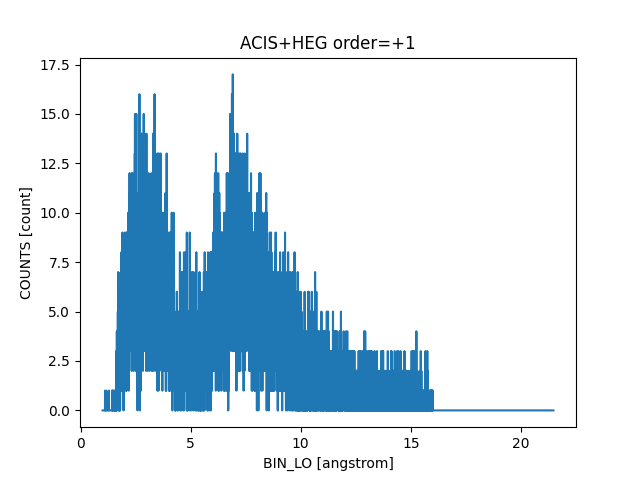

In [8]:
cat << EOM > plt.py
import matplotlib.pyplot as plt
from pycrates import read_file

tab = read_file("heg_p1.fits")
x = tab.get_column("bin_lo").values
y = tab.get_column("counts").values
plt.plot(x,y, marker='None')
plt.xlabel("BIN_LO [angstrom]")
plt.ylabel("COUNTS [count]")
plt.title("ACIS+HEG order=+1")
plt.savefig("plt_01.png")
EOM

python plt.py
display < plt_01.png


## sherpa

In [9]:

cat << EOM > s1.py
import sherpa.astro.ui as ui
import matplotlib.pylab as plt

ui.load_pha("acisf00459N004_pha2.fits")
ui.set_analysis("energy")
ui.plot("data",4,"data",3)
plt.savefig("sherpa_01.png")
EOM

python s1.py
display < sherpa_01.png




statistical errors were found in file 'acisf00459N004_pha2.fits' 
but not used; to use them, re-read with use_errors=True
read background_up into a dataset from file acisf00459N004_pha2.fits
read background_down into a dataset from file acisf00459N004_pha2.fits
Multiple data sets have been input: 1-12


statistical errors were found in file 'acisf00459N004_pha2.fits' 
but not used; to use them, re-read with use_errors=True
read background_up into a dataset from file acisf00459N004_pha2.fits
read background_down into a dataset from file acisf00459N004_pha2.fits
Multiple data sets have been input: 1-12


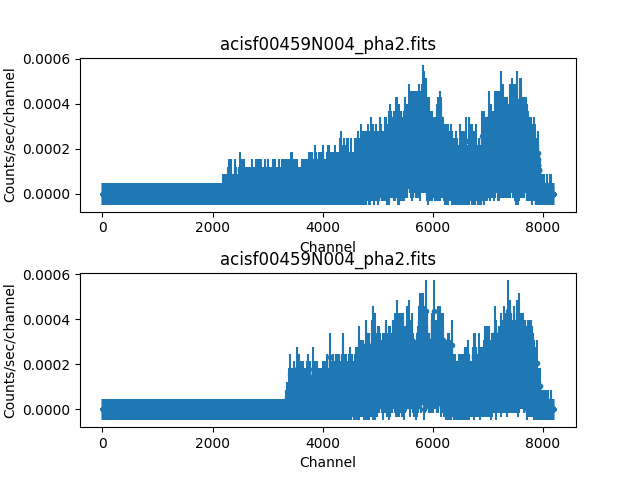

In [10]:

cat << EOM > s2.py
import sherpa.astro.ui as ui
import matplotlib.pylab as plt

ui.load_pha("acisf00459N004_pha2.fits")
ui.set_analysis("channel")

ui.plot("data",4,"data",3)
plt.savefig("sherpa_02.png")
EOM

python s2.py
display < sherpa_02.png




## Display Extraction Regions

In [11]:
dmlist "acisf00459N004_pha2.fits[REGION]" cols

 
--------------------------------------------------------------------------------
Columns for Table Block REGION
--------------------------------------------------------------------------------
 
ColNo  Name                 Unit        Type             Range
   1   SPEC_NUM                          Int2           1:32767              Spectrum number, which points to the row in the
   2   ROWID                             String[64]                          Source or a background region?
   3   SHAPE                             String[16]                          Shape of region
   4   WAVPOS(TG_LAM,TG_D)               Real4          -Inf:+Inf            Wavelength(angstrom), Cross Dispersion(degrees)
   5   R[2]                 (angstrom , degrees) Real4(2)       -Inf:+Inf            Raduis vector for SHAPE
   6   ROTANG               degrees      Real4          -360.0:      360.0   Rotation angle for SHAPE
   7   TG_PART                           Int2           0:9                  G

In [12]:
dmcopy \
      "acisf00459N004_evt2.fits[bin tg_lam=0:30:0.08,tg_d=-0.01:0.01:0.00008][tg_m=-1,1,tg_part=2]" \
      459_order1.fits opt=all cl+

dmcopy \
      "acisf00459N004_evt2.fits[bin tg_lam=0:15:0.08,tg_d=-0.01:0.01:0.00008][tg_m=-3,3,tg_part=2]" \
      459_order3.fits opt=all cl+

dmcopy \
      "acisf00459N004_pha2.fits[region][tg_m=1,tg_part=2][cols x=tg_lam,y=tg_d,*]" \
      region_order1.fits opt=all cl+

dmcopy \
      "acisf00459N004_pha2.fits[region][tg_m=3,tg_part=2][cols x=tg_lam,y=tg_d,*]" \
      region_order3.fits opt=all cl+

[1] 501
[1]+  Done                    ds9 -tile 459_order1.fits -region region_order1.fits -cmap a -scale log 459_order3.fits -region region_order3.fits -cmap a -scale log -saveimage png ds9_01.png


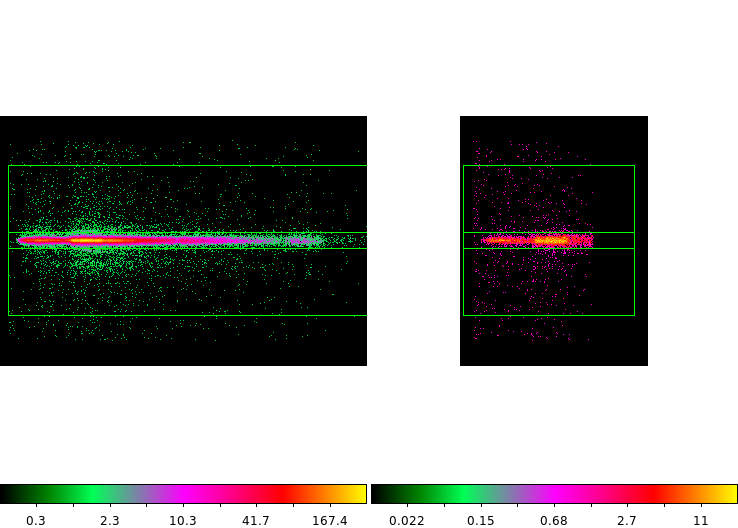

In [13]:
ds9 -tile 459_order1.fits -region region_order1.fits -cmap a -scale log \
      459_order3.fits -region region_order3.fits -cmap a -scale log \
      -saveimage png ds9_01.png &
sleep 10
xpaset -p ds9 quit

display < ds9_01.png
    

### HRC

In [14]:
dmcopy \
      "hrcf00460N005_evt2.fits[bin tg_lam=0:210:0.25,tg_d=-2:2:0.0008][tg_m=-1,1,tg_part=3]" \
      hrc_order1_img.fits opt=all cl+

dmcopy \
      "hrcf00460N005_pha2.fits[REGION][tg_m=1,tg_part=3][cols x=tg_lam,y=tg_d,*]" \
      hrc_region_order1.fits  opt=all cl+


[1] 572
[1]+  Done                    ds9 hrc_order1_img.fits -region hrc_region_order1.fits -cmap b -scale log -saveimage png ds9_02.png


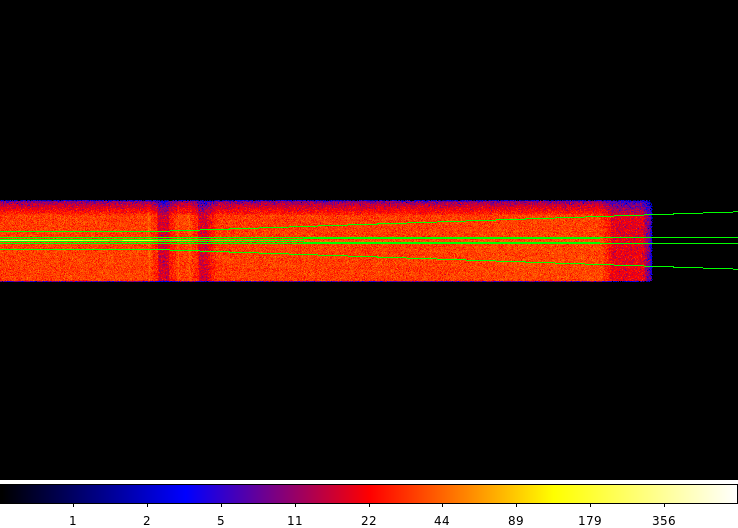

In [15]:
ds9 hrc_order1_img.fits -region hrc_region_order1.fits -cmap b -scale log \
   -saveimage png ds9_02.png &
sleep 10
xpaset -p ds9 quit


display < ds9_02.png

# Cleanup


In [16]:
/bin/rm -rf acisf*fits hrcf*fits 
